# Simulating null geodesics in 2D

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
%matplotlib notebook

In [194]:
#setting up parameters
#all in SI
G = 6.67*10**(-11)
M = 6*10**30 #idk, stereotypical mass of three solar masses i guess
c = 3*10**8 

r = 10000
theta = 0 #to start
r_s = 2*G*M/c**2
num = 200
timestep = 0.0000015

In [195]:
#helpful functions

#for radial
def getdr_dt(r):
    """
        Inputs: 
            r (int or float): current distance of the photon
        Outputs:
            c*(1-r_s/r) (float): returns the radial velocity of the photon in the Schwarzschild geodesic 
    """
    return c*(1-r_s/r)
def populate_r(curr_r, numr):
    """
        Inputs: 
            curr_r (int, float): starting distance of the photon
            numr (int): number of elements to fill rlist with
        Outputs:
            returns two lists; 
            rlist (List<float>): returns all the radial information 
            yvals (List<int>): equally sized y array filled with 0s
    """
    rlist = [curr_r]
    for t in range(numr):
        v = getdr_dt(curr_r)
        r_new = curr_r - v*timestep
        rlist.append(r_new)
        curr_r = r_new
        prevv = v
    yvals = [0]*len(rlist)
    return rlist, yvals

#for orbital
def populatetheta(currtheta, numthetas = 100, r = 10000):
    ''' given an initial theta value, populates a list of thetas describing the angular direction of a photon
        using the schwarzschild geodesic at distance from the black hole r. The length of the list is numthetas.
         The funciton returns the list as a numpy array'''
    returnlist = [currtheta]
    dtheta_dt = np.sqrt(1-r_s/r)*c/r
    print(dtheta_dt)
    delta_t = 0.000003
    for i in range(numthetas):
        newtheta = (currtheta + dtheta_dt*delta_t)
        returnlist.append(newtheta)
        currtheta = newtheta
    return np.array(returnlist)

def polartocartesian(listtheta, r):
    # returns two arrays: one describing the position in the x axis, and the other, the y axis. 
    # x[i] corresponds to y[i] for i in len(listtheta)
    x = r*np.cos(listtheta)
    y = r*np.sin(listtheta) 
    return np.array(x), np.array(y)

## Photon trajectory in the radial direction

In [196]:
#calculating r at all timesteps
rlist, yvals = populate_r(r, num)

<IPython.core.display.Javascript object>


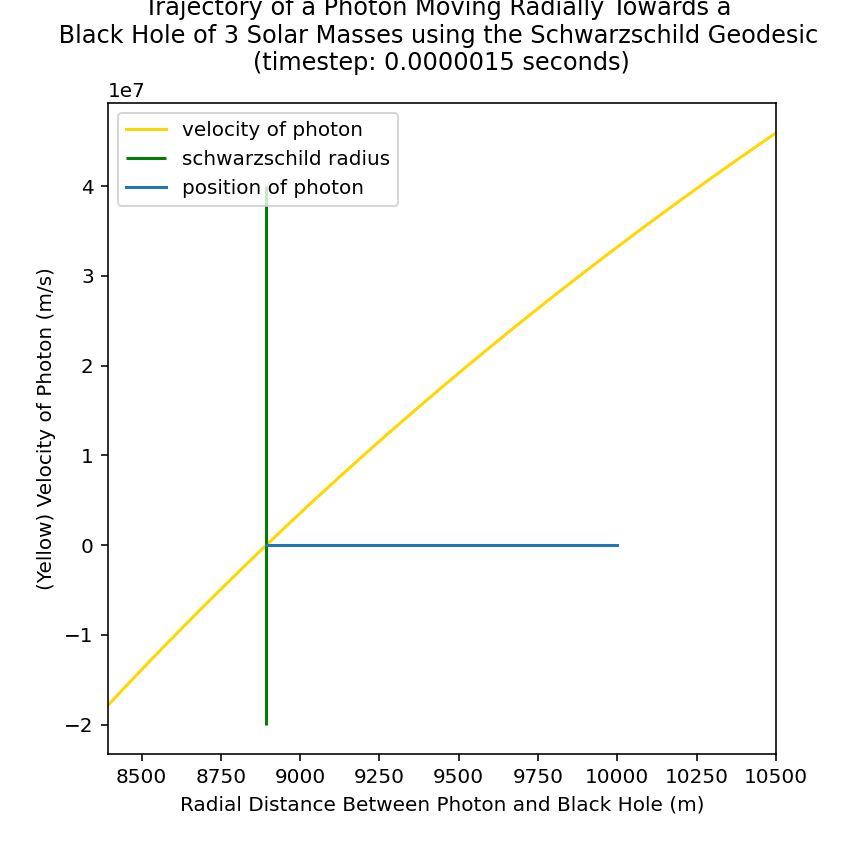

In [197]:
#plotting

fig, ax = plt.subplots()
fig.set_figheight(6)
ax.set_xlim(min(rlist) - 500, max(rlist) + 500)

rvals = np.linspace(min(rlist) - 500, max(rlist) + 500,100)
velocity =  getdr_dt(rvals)

ax.plot(rvals, velocity, label="velocity of photon", color = "gold")

ax.vlines(r_s, -2*10**7, 4*10**7, label = "schwarzschild radius", color="green")
animated_plot1, = ax.plot([],[], label="position of photon")

ax.title.set_text('Trajectory of a Photon Moving Radially Towards a \n Black Hole of 3 Solar Masses using the Schwarzschild Geodesic  \n(timestep: 0.0000015 seconds)')
ax.set_ylabel('(Yellow) Velocity of Photon (m/s)')
ax.set_xlabel("Radial Distance Between Photon and Black Hole (m)")
plt.legend()
plt.show()

#animation
def animate(frame):
    animated_plot1.set_data(rlist[:frame], yvals[:frame])
    return animated_plot1

ani = animation.FuncAnimation(fig = fig, func = animate, repeat=True,
                                    frames= len(rlist), interval=10)

## Photon trajectory in the orbital direction

In [198]:
listtheta = populatetheta(theta, num, r)
xpos, ypos = polartocartesian(listtheta, r)

9979.979959899716


In [199]:
#circle for the schwarzschild radius
x_s, y_s = polartocartesian(np.linspace(0,2*np.pi, 100), r_s)

<IPython.core.display.Javascript object>


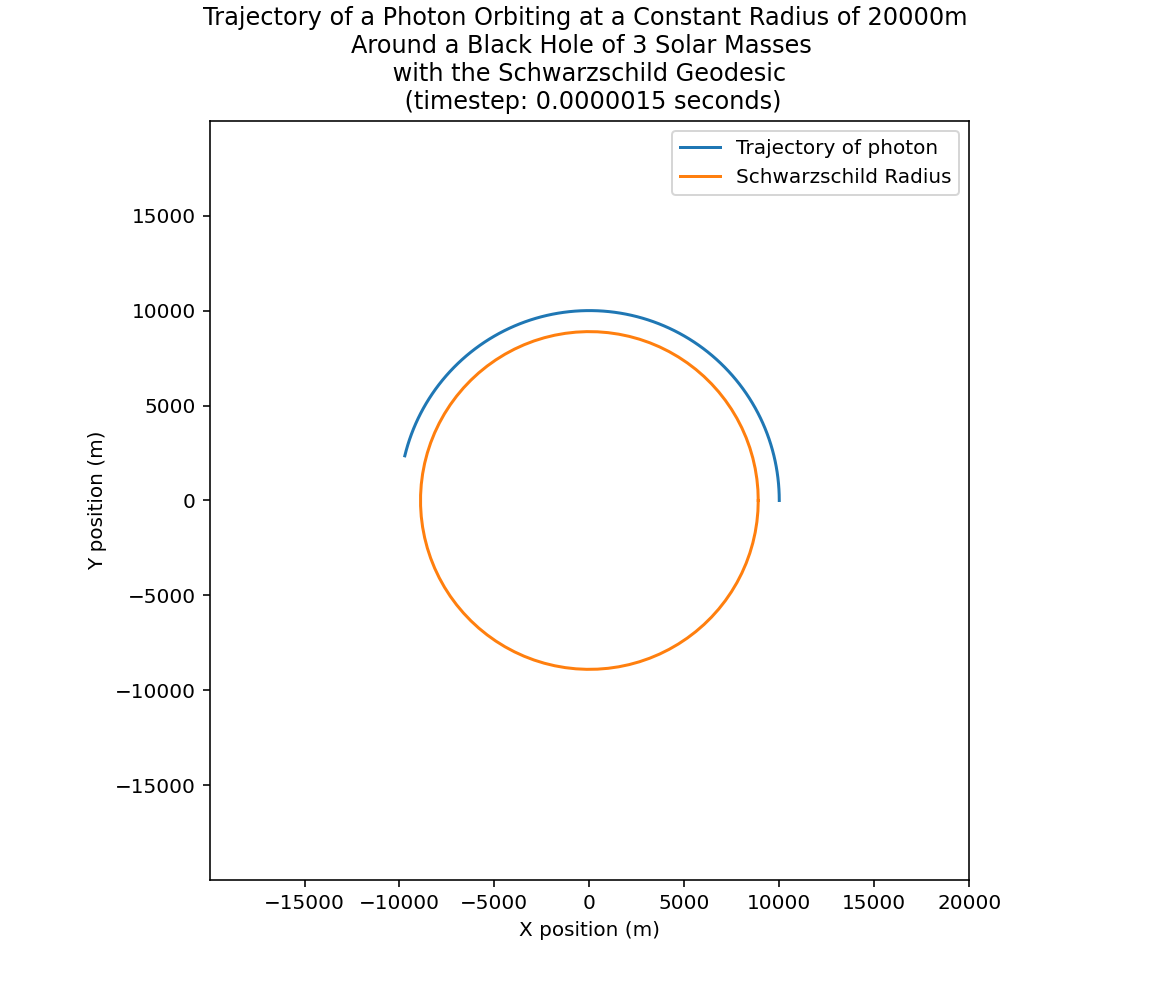

In [200]:
#plotting
fig1, ax1 = plt.subplots()
fig1.set_figheight(7)
fig1.set_figwidth(8)
ax1.set_xlim(min(xpos) - 10000, max(xpos) + 10000)
ax1.set_ylim(min(ypos) - 10000, max(ypos) + 10000)
ax1.set_aspect('equal', adjustable='box')
animated_plot2, = ax1.plot([],[], label="Trajectory of photon")

ax1.title.set_text('Trajectory of a Photon Orbiting at a Constant Radius of 20000m \nAround a Black Hole of 3 Solar Masses  \n with the Schwarzschild Geodesic \n (timestep: 0.0000015 seconds)')
ax1.set_ylabel('Y position (m)')
ax1.set_xlabel("X position (m)")

ax1.plot(x_s, y_s, label="Schwarzschild Radius")

plt.legend()
plt.show()

#animation
def animate2(frame):
    animated_plot2.set_data(xpos[:frame], ypos[:frame])
    return animated_plot2
ani = animation.FuncAnimation(fig = fig, func = animate2, repeat=True,
                                    frames= len(ypos), interval=50)



## Trajectory of a Photon in Both the Radial and Orbital Direction